In [1]:
import numpy as np

In [2]:
from vid_utils import Video_Utils

In [3]:
%matplotlib inline

In [4]:
VIDEO_DIR = '../../video/raw'
LABEL_DIR = 'data'

In [5]:
x, y = Video_Utils.get_transformed_data(crop_height=[150,350],video_dir=VIDEO_DIR, label_dir=LABEL_DIR)

VID_20180325_143338.mp4 is good to use
fetching data/VID_20180325_143338.mp4.csv
loaded video sized 1.384128144gb
cropping...
resizing...
compressed 0 images
compressed 200 images
compressed 400 images
compressed 600 images
compressed 800 images
compressed 1000 images
compressed 1200 images
grayscaling..
done
transformed video now sized 0.061516928gb


In [6]:
x.shape

(1335, 40, 144)

In [10]:
# delta images
def transform_to_delta(x, y, thresh=0.015):
    new_x = (x[:-1] - x[1:]) > thresh
    new_y = y[1:]
    assert(len(new_x)==len(new_y))
    return new_x, new_y

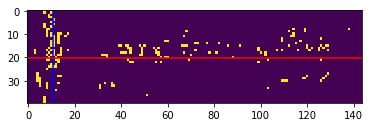

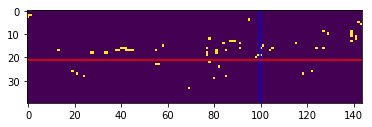

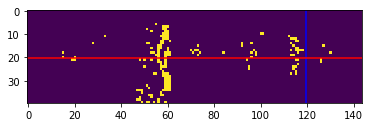

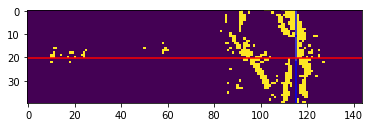

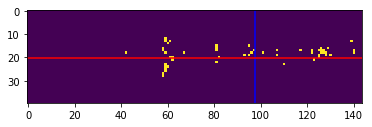

((1334, 40, 144), (1334, 2))

In [13]:
x_delta, y_delta = transform_to_delta(x, y)
Video_Utils.show_sample_images_with_labels(x_delta, y_delta)
x_delta.shape, y_delta.shape

In [33]:
# image stacks
def transform_to_stack(x, y, stack_size=5):
    new_len = len(x) - stack_size
    x_stack = np.zeros([new_len, stack_size, *x.shape[1:]])
    
    for i in range(new_len):
        x_stack[i] = x[i:i+stack_size]
    
    y_stack = y[stack_size:]
    
    assert(len(x_stack)==len(y_stack))
    
    return x_stack, y_stack

In [53]:
x_stack, y_stack = transform_to_stack(x_delta, y_delta)

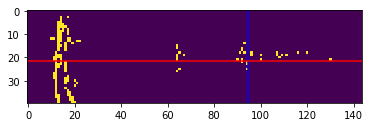

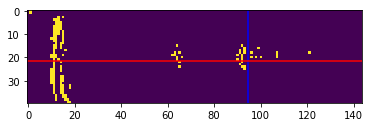

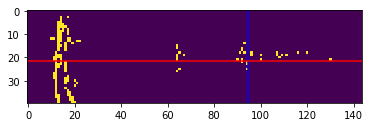

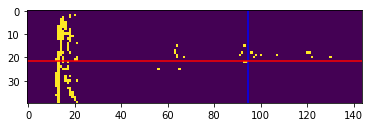

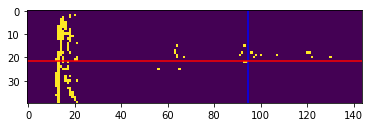

In [54]:
Video_Utils.show_sample_images_with_labels(x_stack[100], np.repeat([y_stack[100]], 5, axis=0))

In [55]:
# stretch framerate 
